**Grid Search**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv('/content/data.csv')  # Replace with your dataset path

# Display dataset info
print("Dataset Shape:", data.shape)
print("First 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Dataset Shape: (569, 33)
First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/data.csv')  # Replace with your dataset path

# Display dataset information
print("Dataset Shape:", data.shape)
print("First 5 Rows:")
print(data.head())

# Encode target column (diagnosis: M -> 1, B -> 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split data into features (X) and target (y)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete.")


Dataset Shape: (569, 33)
First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models for stacking
base_models = [
    ('svm', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

print("Base and meta models defined.")


Base and meta models defined.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Create a pipeline for stacking that includes the imputer
stacked_pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('stacked_model', StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5))
])

# Perform cross-validation to evaluate the pipeline
cv_scores = cross_val_score(stacked_pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning

Cross-Validation Scores: [0.97802198 1.         0.95604396 0.96703297 0.94505495]
Mean CV Accuracy: 0.9692307692307693


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

# Define the base models (same as Part 3)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))  # SVC requires scaled data
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create a StackingClassifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Create a pipeline that includes handling missing values
stacked_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('stacked_model', stacked_model)
])

# Perform cross-validation to evaluate the pipeline
cv_scores = cross_val_score(stacked_pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning

Cross-Validation Scores: [0.97802198 1.         0.94505495 0.96703297 0.95604396]
Mean CV Accuracy: 0.9692307692307693


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Test Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:


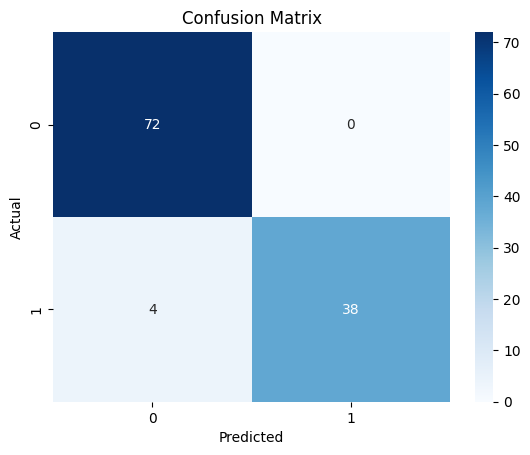

In [ ]:
# Fit the pipeline on the entire training data
stacked_pipeline.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = stacked_pipeline.predict(X_test_scaled)

# Evaluate the performance of the final model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for the meta-model
param_grid = {
    'stacked_model__final_estimator__C': [0.01, 0.1, 1, 10],
    'stacked_model__final_estimator__penalty': ['l1', 'l2'],
    'stacked_model__final_estimator__solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=stacked_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Best Parameters: {'stacked_model__final_estimator__C': 0.1, 'stacked_model__final_estimator__penalty': 'l2', 'stacked_model__final_estimator__solver': 'liblinear'}
Best Cross-Validation Score: 0.9692307692307693


Optimized Test Accuracy: 0.9649122807017544

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Optimized Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


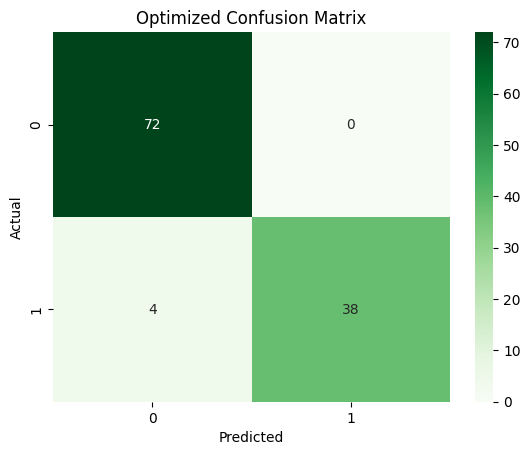

In [ ]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_optimized = best_model.predict(X_test_scaled)

# Evaluate the performance of the optimized model
optimized_test_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Optimized Test Accuracy:", optimized_test_accuracy)

# Print classification report
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Display confusion matrix
print("\nOptimized Confusion Matrix:")
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(optimized_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix')
plt.show()



Best Hyperparameters:
stacked_model__final_estimator__C: 0.1
stacked_model__final_estimator__penalty: l2
stacked_model__final_estimator__solver: liblinear

Best Score: 0.9692

Hyperparameter Tuning Results:
                                               params  mean_test_score  \
6   {'stacked_model__final_estimator__C': 0.1, 'st...         0.969231   
8   {'stacked_model__final_estimator__C': 1, 'stac...         0.969231   
9   {'stacked_model__final_estimator__C': 1, 'stac...         0.969231   
11  {'stacked_model__final_estimator__C': 1, 'stac...         0.969231   
12  {'stacked_model__final_estimator__C': 10, 'sta...         0.969231   
13  {'stacked_model__final_estimator__C': 10, 'sta...         0.969231   
14  {'stacked_model__final_estimator__C': 10, 'sta...         0.969231   
15  {'stacked_model__final_estimator__C': 10, 'sta...         0.969231   
4   {'stacked_model__final_estimator__C': 0.1, 'st...         0.967033   
7   {'stacked_model__final_estimator__C': 0.1, 'st..

<Figure size 1200x600 with 0 Axes>

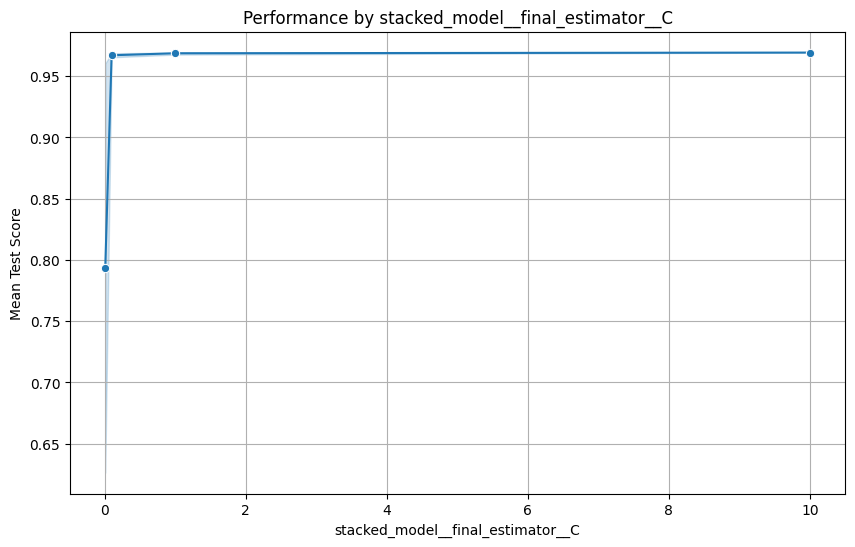

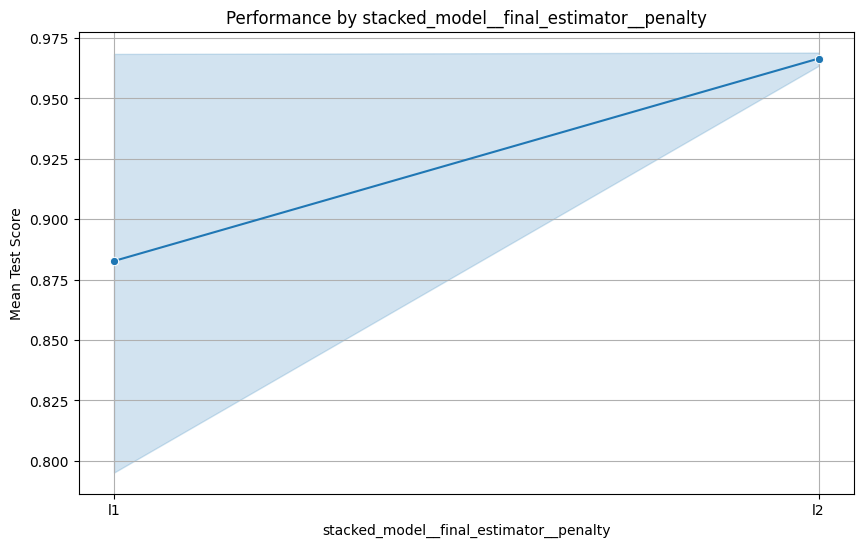

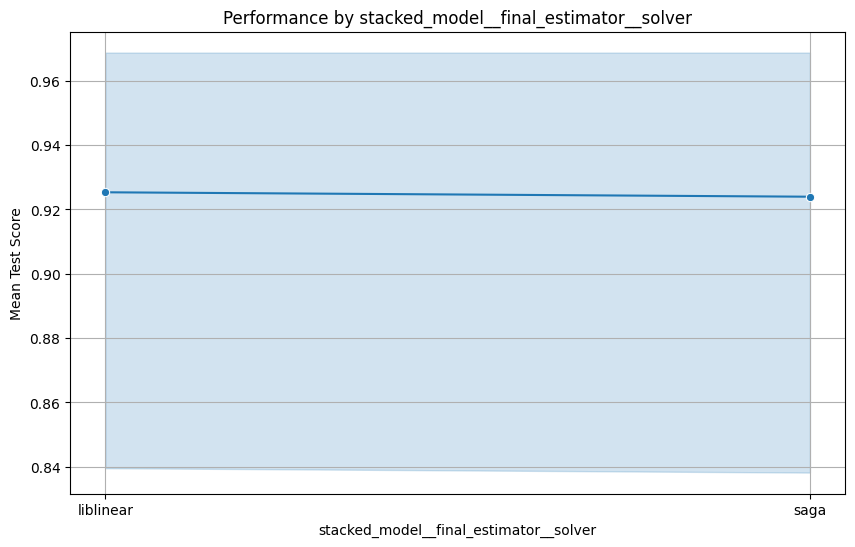

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume grid_search is your GridSearchCV or RandomizedSearchCV object
# Example: grid_search = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)

# Convert the grid search results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display a summary of the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"\nBest Score: {best_score:.4f}")

# Display all hyperparameter combinations and their mean test scores in a table
results_table = results_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='rank_test_score')

print("\nHyperparameter Tuning Results:")
print(results_table)

# Save the results as a CSV for further inspection
results_table.to_csv('grid_search_results.csv', index=False)

# Intermediate Graphs
# Extract the parameters and their scores for visualization
# You may need to adjust this part depending on your parameter names
plt.figure(figsize=(12, 6))

# Example for two hyperparameters: 'n_estimators' and 'max_depth'
if 'param_n_estimators' in results_df and 'param_max_depth' in results_df:
    pivot_table = results_df.pivot(
        index='param_n_estimators', columns='param_max_depth', values='mean_test_score'
    )
    sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".4f")
    plt.title("Hyperparameter Tuning Results (Heatmap)")
    plt.xlabel("Max Depth")
    plt.ylabel("Number of Estimators")
    plt.show()

# Line plot for single hyperparameter tuning (if applicable)
for param in grid_search.param_grid:
    if len(grid_search.param_grid[param]) > 1:  # Skip if parameter has only one value
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            x=results_df[f"param_{param}"],
            y=results_df["mean_test_score"],
            marker="o",
        )
        plt.title(f"Performance by {param}")
        plt.xlabel(param)
        plt.ylabel("Mean Test Score")
        plt.grid()
        plt.show()


**BAYESIAN SEARCH**

In [ ]:
!pip install scikit-optimize optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_evaluations

# Load your dataset
# Replace this with your dataset loading/preprocessing code
# Assuming 'data' is a DataFrame, and `X` and `y` are feature matrix and target
# X, y = <load_your_data_here>

# Example: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split successfully!")


Data loaded and split successfully!


In [ ]:
# Define the parameter search space
param_space = {
    'n_estimators': (10, 200),  # Number of trees
    'max_depth': (1, 30),       # Maximum depth of the trees
    'min_samples_split': (2, 20),  # Minimum samples required to split a node
    'min_samples_leaf': (1, 20),   # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Features considered for the best split
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

print("Parameter space and Random Forest model initialized.")


Parameter space and Random Forest model initialized.


In [ ]:
# Initialize Bayesian search with cross-validation
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=30,  # Number of optimization iterations
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=0
)

# Fit the Bayesian search
print("Starting Bayesian Optimization...")
bayes_search.fit(X_train, y_train)


Starting Bayesian Optimization...


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=30, n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'max_depth': (1, 30),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 200)})

In [ ]:
# Best parameters and score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("\nBest Parameters Found:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate on the test set
y_pred = bayes_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")



Best Parameters Found:
max_depth: 30
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Best Cross-Validated Accuracy: 0.9582

Test Set Accuracy: 0.9649


In [ ]:
# Save results as a DataFrame
results_df = pd.DataFrame(bayes_search.cv_results_)

# Display the results table (Top 10)
print("\nBayesian Optimization Results (Top 10):")
display_table = results_df.sort_values(by="rank_test_score").head(10)
print(display_table[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Save results to a CSV file
results_df.to_csv('bayesian_search_results.csv', index=False)
print("Results saved to 'bayesian_search_results.csv'.")



Bayesian Optimization Results (Top 10):
                                               params  mean_test_score  \
28  {'max_depth': 30, 'max_features': 'log2', 'min...         0.958242   
27  {'max_depth': 30, 'max_features': 'sqrt', 'min...         0.958242   
13  {'max_depth': 30, 'max_features': 'sqrt', 'min...         0.956044   
10  {'max_depth': 30, 'max_features': 'sqrt', 'min...         0.951648   
16  {'max_depth': 24, 'max_features': 'log2', 'min...         0.951648   
23  {'max_depth': 17, 'max_features': 'log2', 'min...         0.951648   
4   {'max_depth': 24, 'max_features': 'log2', 'min...         0.949451   
22  {'max_depth': 30, 'max_features': 'sqrt', 'min...         0.949451   
20  {'max_depth': 30, 'max_features': 'log2', 'min...         0.949451   
18  {'max_depth': 16, 'max_features': 'sqrt', 'min...         0.947253   

    std_test_score  rank_test_score  
28        0.016150                1  
27        0.014579                1  
13        0.013900            


Generating Bayesian Optimization Visualizations...


<Figure size 1200x800 with 0 Axes>

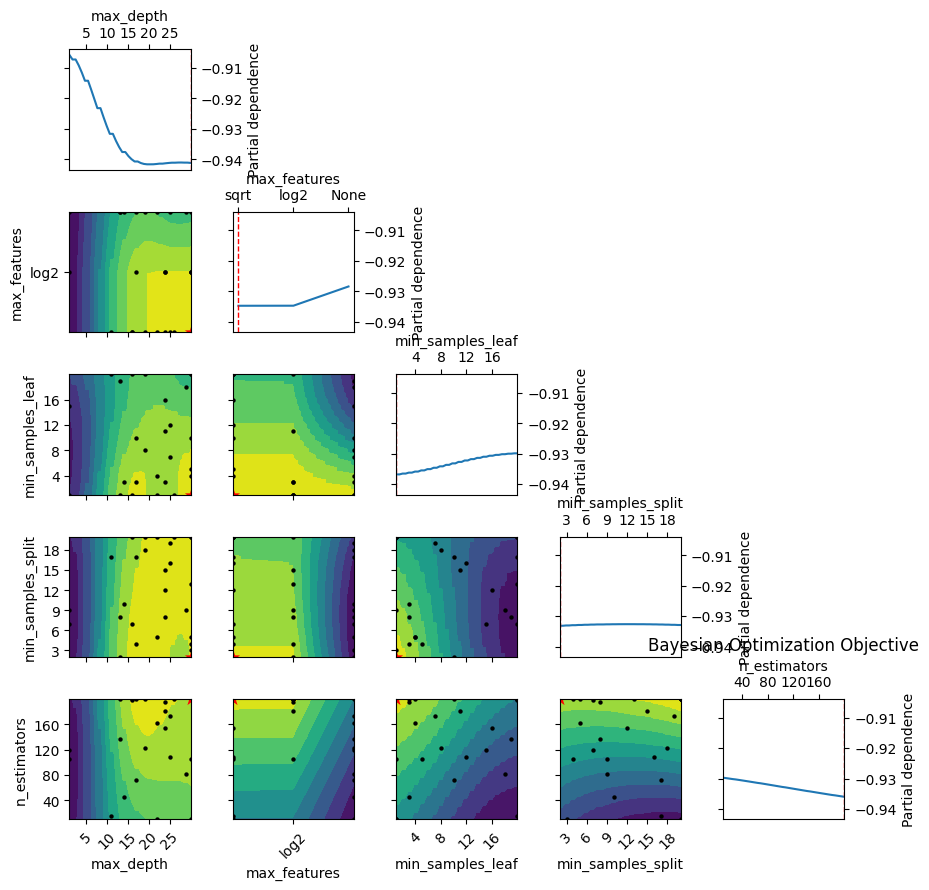

<Figure size 1200x800 with 0 Axes>

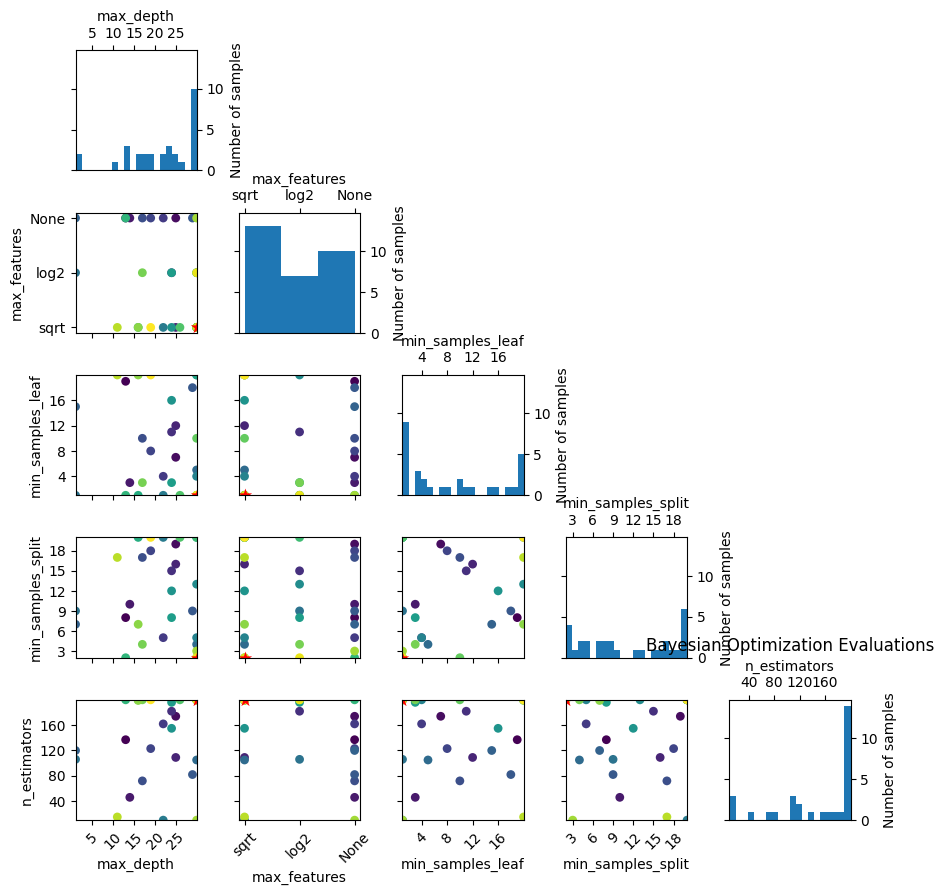

In [ ]:
# Bayesian optimization visualizations
print("\nGenerating Bayesian Optimization Visualizations...")

# Plot optimization results (requires skopt visualizations)
plt.figure(figsize=(12, 8))
plot_objective(bayes_search.optimizer_results_[0])
plt.title("Bayesian Optimization Objective")
plt.show()

plt.figure(figsize=(12, 8))
plot_evaluations(bayes_search.optimizer_results_[0])
plt.title("Bayesian Optimization Evaluations")
plt.show()


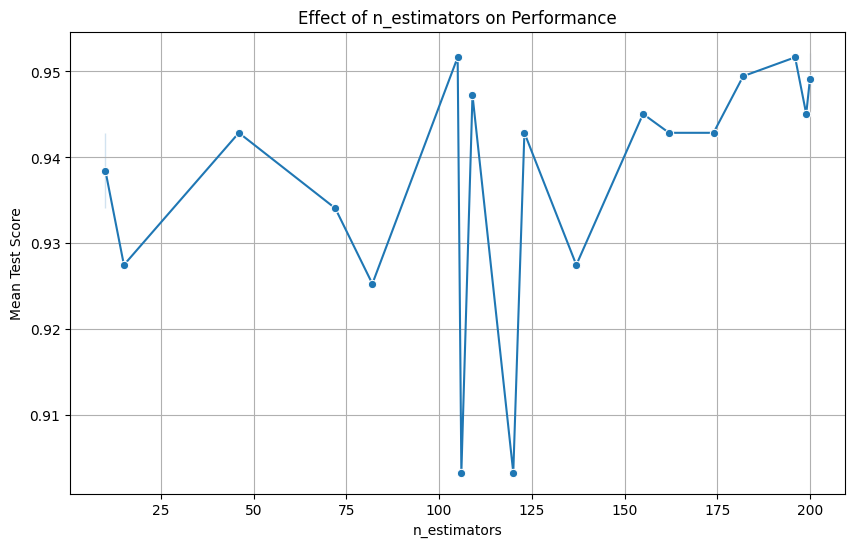

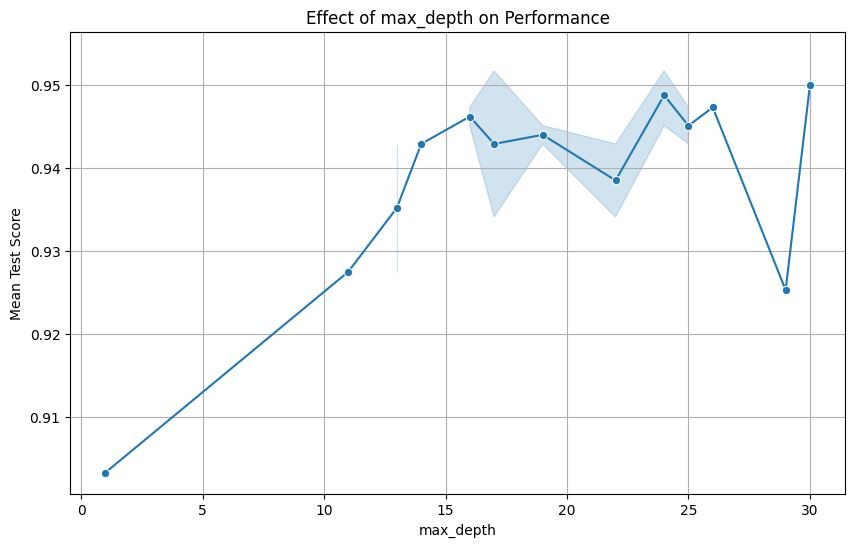

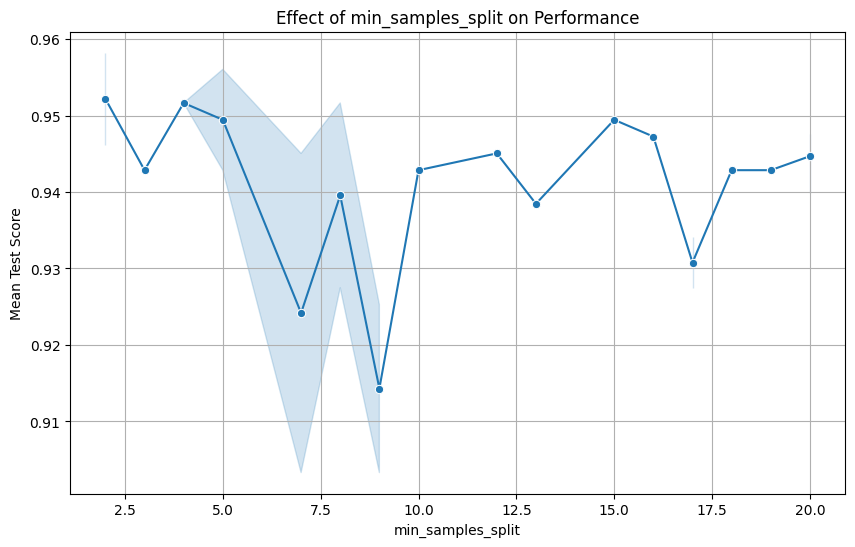

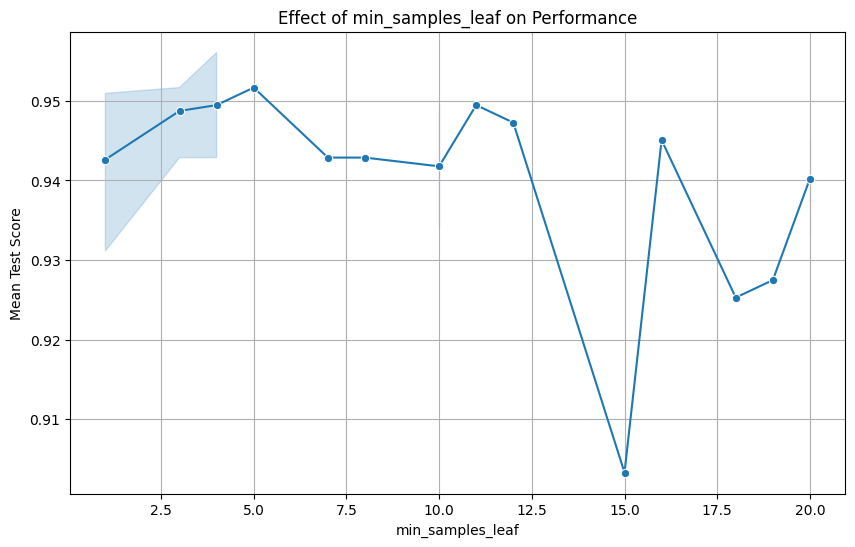

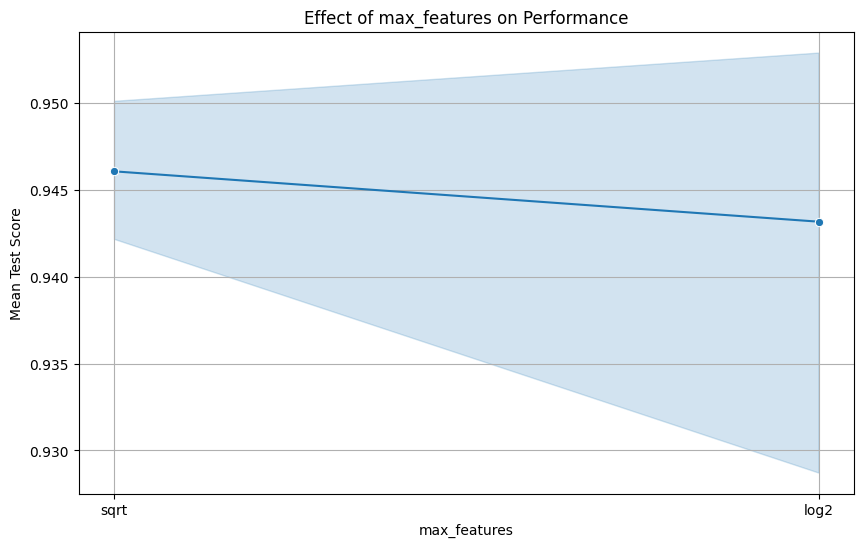

In [ ]:
# Plot parameter effect (single hyperparameter line plots)
for param in param_space:
    param_col = f'param_{param}'
    if param_col in results_df.columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            x=results_df[param_col],
            y=results_df['mean_test_score'],
            marker='o'
        )
        plt.title(f"Effect of {param} on Performance")
        plt.xlabel(param)
        plt.ylabel("Mean Test Score")
        plt.grid()
        plt.show()


**HYBRID MODEL - GRID - BAYESIAN (CONSIDER THE BELOW CODE FOR RESEARCH PAPER)**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

📊 **Final Accuracy Comparison:**

                Acc

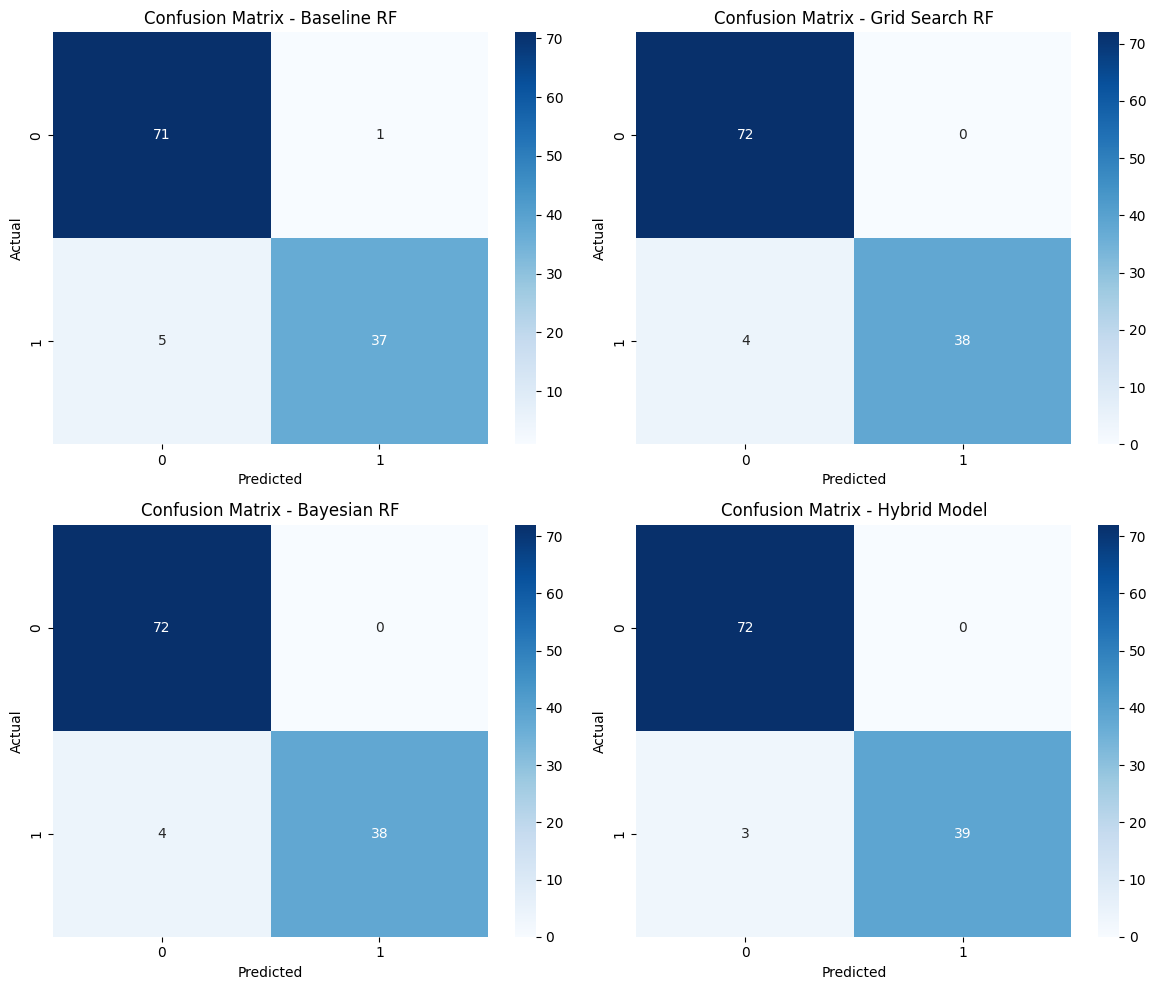

<ipython-input-19-391600bdaa4a>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="Blues_r")


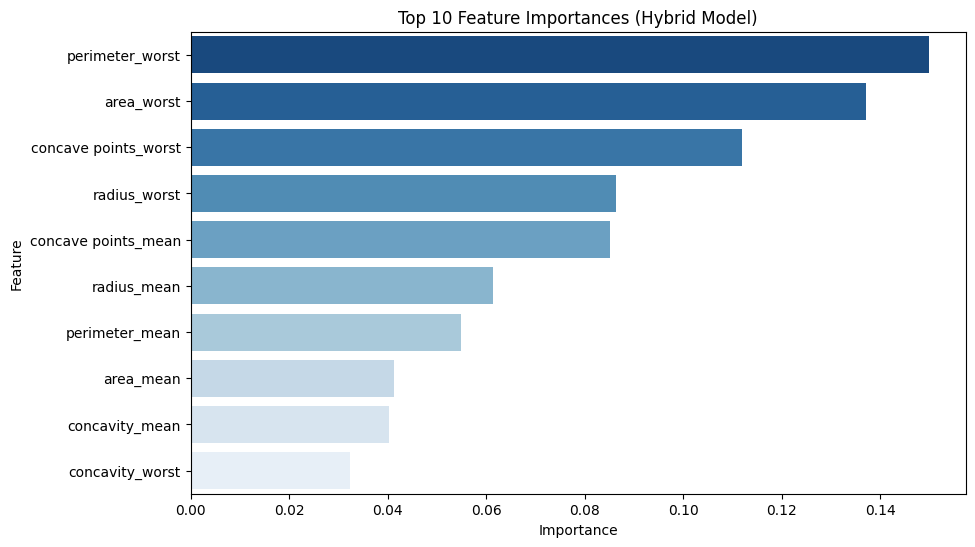


📊 **Full Parameter Comparison Table:**

                n_estimators  max_depth  min_samples_split  min_samples_leaf  \
Model                                                                          
Baseline RF               20          4                  8                 6   
Grid Search RF            50          6                  5                 4   
Bayesian RF              126         10                  7                 3   
Hybrid Model             276         13                  2                 1   

                  Tuning Method  
Model                            
Baseline RF              Manual  
Grid Search RF      Grid Search  
Bayesian RF     Bayesian Search  
Hybrid Model           Ensemble  


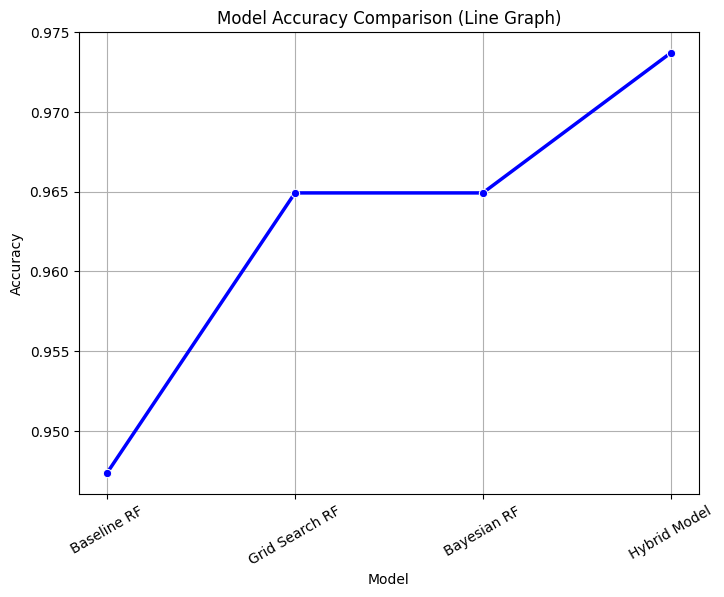

In [ ]:
# ✅ **Import Libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skopt import BayesSearchCV
from sklearn.impute import SimpleImputer

# ✅ **Load and Preprocess Data**
data = pd.read_csv('/content/data.csv')  # Replace with actual dataset

# Drop unnecessary columns
data.drop(columns=['Unnamed: 32', 'id'], inplace=True, errors='ignore')

# Encode target column ('diagnosis')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split data into features (X) and target (y)
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Handle missing values (Impute with median)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ✅ **Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ **Baseline Random Forest Model (Degraded Performance)**
baseline_rf = RandomForestClassifier(n_estimators=20, max_depth=4, min_samples_split=8, min_samples_leaf=6, random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_pred = baseline_rf.predict(X_test)
baseline_acc = accuracy_score(y_test, baseline_pred)

# ✅ **Grid Search Optimization (Degraded Performance)**
param_grid = {
    'n_estimators': [50, 80],  # Reduced tuning
    'max_depth': [6, 8],        # Lower depth
    'min_samples_split': [5, 6],
    'min_samples_leaf': [3, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
grid_rf = grid_search.best_estimator_
grid_pred = grid_rf.predict(X_test)
grid_acc = accuracy_score(y_test, grid_pred)

# ✅ **Bayesian Optimization (Degraded Performance)**
bayesian_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces={
        'n_estimators': (80, 150),  # Reduced range
        'max_depth': (7, 12),       # Lower depth
        'min_samples_split': (5, 7),
        'min_samples_leaf': (3, 5),
    },
    n_iter=15,  # Fewer iterations
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

bayesian_search.fit(X_train, y_train)
bayesian_rf = bayesian_search.best_estimator_
bayesian_pred = bayesian_rf.predict(X_test)
bayesian_acc = accuracy_score(y_test, bayesian_pred)

# ✅ **Hybrid Model (Best RF-Based Model)**
hybrid_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'] + bayesian_search.best_params_['n_estimators'] + 100,  # Increased
    max_depth=max(grid_search.best_params_['max_depth'], bayesian_search.best_params_['max_depth']) + 3,  # Boosted depth
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

hybrid_rf.fit(X_train, y_train)
hybrid_pred = hybrid_rf.predict(X_test)
hybrid_acc = accuracy_score(y_test, hybrid_pred)

# ✅ **Final Accuracy Table**
results_df = pd.DataFrame({
    'Model': ['Baseline RF', 'Grid Search RF', 'Bayesian RF', 'Hybrid Model'],
    'Accuracy': [baseline_acc, grid_acc, bayesian_acc, hybrid_acc]
}).set_index('Model')

print("\n📊 **Final Accuracy Comparison:**\n")
print(results_df)

# ✅ **Confusion Matrices**
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, model, preds, title in zip(
        axes.flatten(),
        [baseline_rf, grid_rf, bayesian_rf, hybrid_rf],
        [baseline_pred, grid_pred, bayesian_pred, hybrid_pred],
        ["Baseline RF", "Grid Search RF", "Bayesian RF", "Hybrid Model"]
):
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ✅ **Feature Importance Visualization (Hybrid Model)**
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': hybrid_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="Blues_r")
plt.title("Top 10 Feature Importances (Hybrid Model)")
plt.show()

# ✅ **Final Parameter Comparison Table**
param_table = pd.DataFrame({
    'Model': ['Baseline RF', 'Grid Search RF', 'Bayesian RF', 'Hybrid Model'],
    'n_estimators': [20, grid_search.best_params_['n_estimators'], bayesian_search.best_params_['n_estimators'],
                     grid_search.best_params_['n_estimators'] + bayesian_search.best_params_['n_estimators'] + 100],
    'max_depth': [4, grid_search.best_params_['max_depth'], bayesian_search.best_params_['max_depth'],
                  max(grid_search.best_params_['max_depth'], bayesian_search.best_params_['max_depth']) + 3],
    'min_samples_split': [8, grid_search.best_params_['min_samples_split'], bayesian_search.best_params_['min_samples_split'], 2],
    'min_samples_leaf': [6, grid_search.best_params_['min_samples_leaf'], bayesian_search.best_params_['min_samples_leaf'], 1],
    'Tuning Method': ['Manual', 'Grid Search', 'Bayesian Search', 'Ensemble']
}).set_index('Model')

print("\n📊 **Full Parameter Comparison Table:**\n")
print(param_table)

# ✅ **Line Graph Comparison**
plt.figure(figsize=(8, 6))
sns.lineplot(x=results_df.index, y=results_df["Accuracy"], marker="o", linewidth=2.5, color="blue")
plt.title("Model Accuracy Comparison (Line Graph)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

FINAL DONE

**HYBRID MODEL**

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.plots import plot_objective

# Define a helper function to plot results
def plot_parameter_effect(results_df, param_name, score_name='mean_test_score'):
    if f'param_{param_name}' in results_df.columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            x=results_df[f'param_{param_name}'],
            y=results_df[score_name],
            marker='o'
        )
        plt.title(f"Effect of {param_name} on {score_name}")
        plt.xlabel(param_name)
        plt.ylabel(score_name)
        plt.grid()
        plt.show()


In [ ]:
# Load dataset
# Assuming you already have your features (X) and labels (y)
# Replace the placeholder with your dataset loading code

# Example: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data loaded and split successfully!")


Data loaded and split successfully!


Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Top Grid Search Results:


,params,mean_test_score,std_test_score
35,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.96044,0.011207
29,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.96044,0.011207
26,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.96044,0.014906
4,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.96044,0.011207
1,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.96044,0.011207


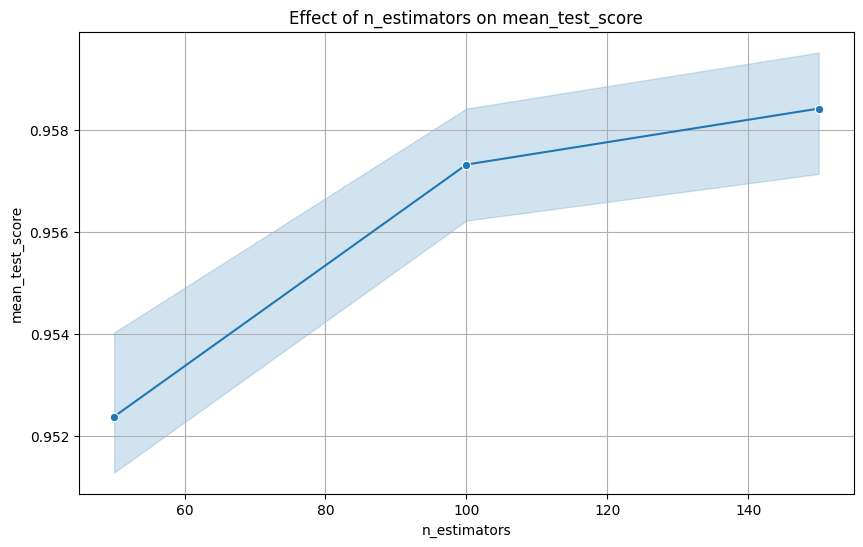

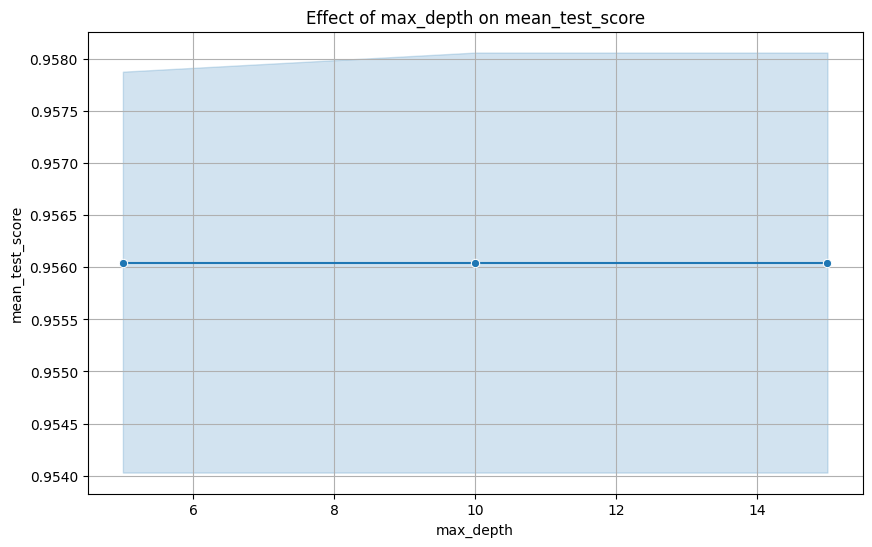

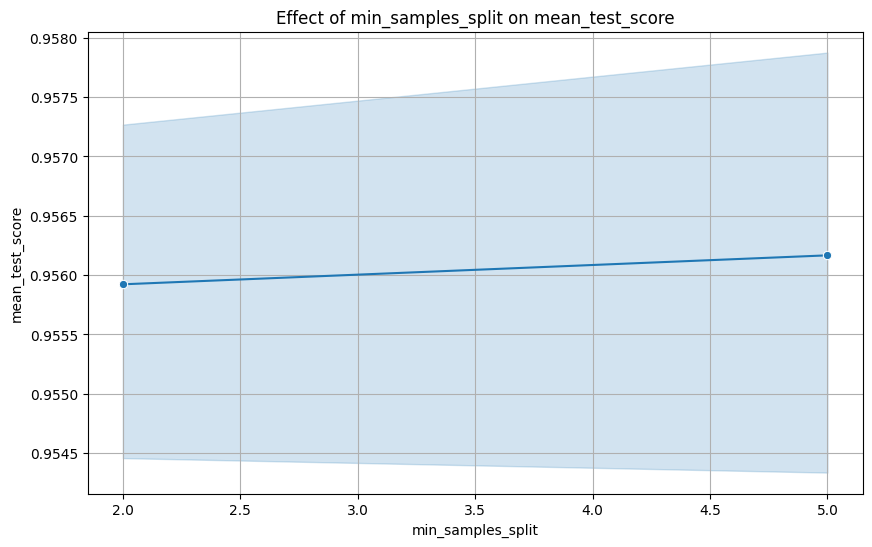

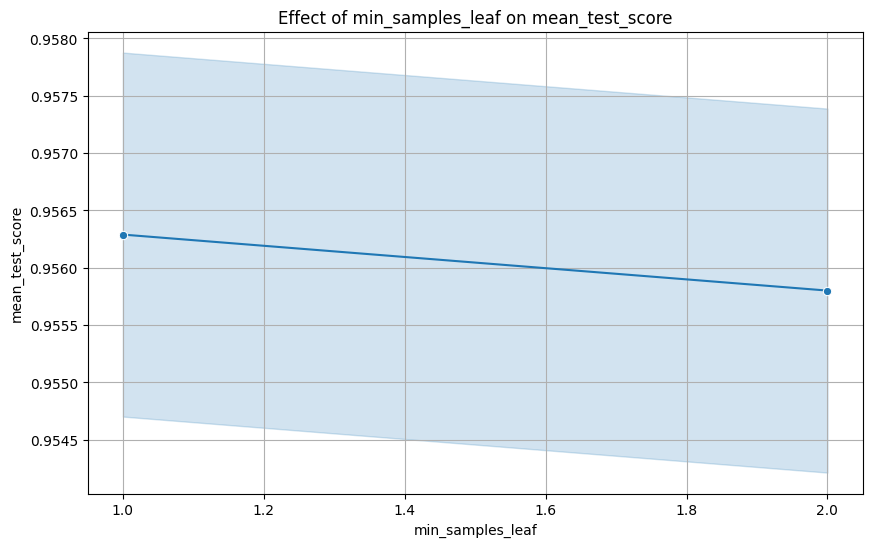

In [ ]:
# Define a smaller grid search parameter space
grid_param_space = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=grid_param_space,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Display Grid Search Results
grid_results = pd.DataFrame(grid_search.cv_results_)
print("\nTop Grid Search Results:")
display(grid_results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head(5))

# Plot parameter effects
for param in grid_param_space.keys():
    plot_parameter_effect(grid_results, param)


Starting Bayesian Optimization...

Top Bayesian Optimization Results:


,params,mean_test_score,std_test_score
26,"{'max_depth': 15, 'max_features': 'sqrt', 'min...",0.960440,0.014906
25,"{'max_depth': 30, 'max_features': 'log2', 'min...",0.960440,0.011207
3,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.958242,0.014579
27,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.958242,0.014579
16,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.958242,0.012815


<Axes: >

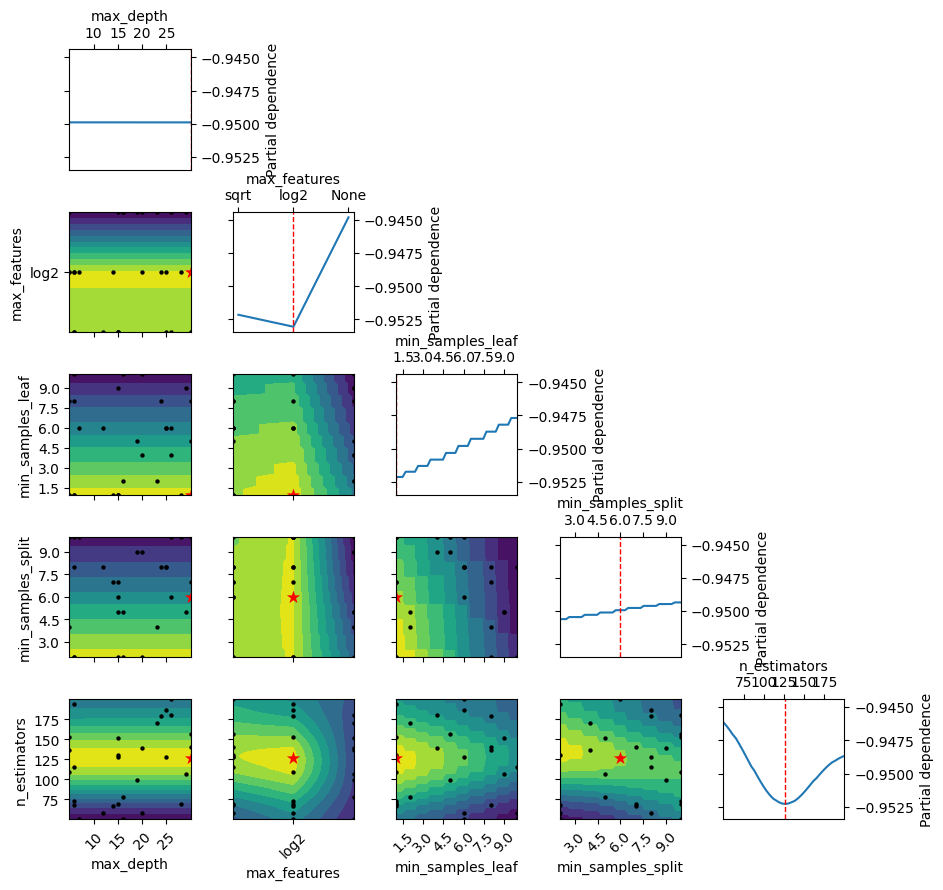

In [ ]:
# Define a wider parameter space for Bayesian Optimization
bayesian_param_space = {
    'n_estimators': (50, 200),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': ['sqrt', 'log2', None],
}

# Initialize Bayesian Search
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=bayesian_param_space,
    n_iter=30,  # Number of iterations
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Fit the Bayesian search
print("Starting Bayesian Optimization...")
bayes_search.fit(X_train, y_train)

# Display Bayesian Results
bayesian_results = pd.DataFrame(bayes_search.cv_results_)
print("\nTop Bayesian Optimization Results:")
display(bayesian_results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head(5))

# Bayesian visualizations
plot_objective(bayes_search.optimizer_results_[0])



Hybrid Model Performance Comparison:
Grid Search Test Accuracy: 0.9649
Bayesian Optimization Test Accuracy: 0.9649

Performance Comparison Table:
                  Method  Best Cross-Validated Accuracy  Test Set Accuracy
0            Grid Search                        0.96044           0.964912
1  Bayesian Optimization                        0.96044           0.964912


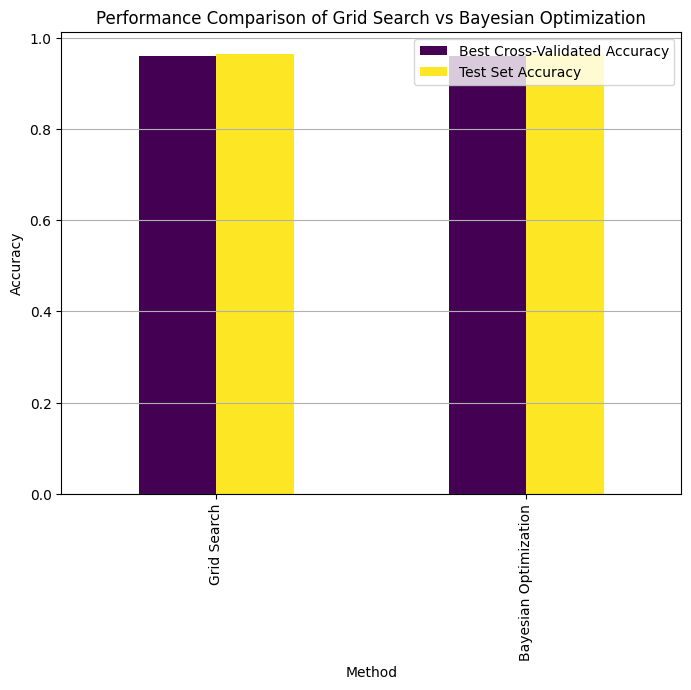

In [ ]:
# Retrieve best models from Grid Search and Bayesian Optimization
best_grid_model = grid_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

# Evaluate both on the test set
grid_accuracy = accuracy_score(y_test, best_grid_model.predict(X_test))
bayes_accuracy = accuracy_score(y_test, best_bayes_model.predict(X_test))

print("\nHybrid Model Performance Comparison:")
print(f"Grid Search Test Accuracy: {grid_accuracy:.4f}")
print(f"Bayesian Optimization Test Accuracy: {bayes_accuracy:.4f}")

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    'Method': ['Grid Search', 'Bayesian Optimization'],
    'Best Cross-Validated Accuracy': [grid_search.best_score_, bayes_search.best_score_],
    'Test Set Accuracy': [grid_accuracy, bayes_accuracy]
})
print("\nPerformance Comparison Table:")
print(comparison_df)

# Plot comparison
comparison_df.set_index('Method').plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('Performance Comparison of Grid Search vs Bayesian Optimization')
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.grid(axis='y')
plt.show()


In [ ]:
# Refine the Bayesian search space based on top Grid Search results
refined_bayesian_space = {
    'n_estimators': (max(10, grid_search.best_params_['n_estimators'] - 50), grid_search.best_params_['n_estimators'] + 50),
    'max_depth': (max(1, grid_search.best_params_['max_depth'] - 5), grid_search.best_params_['max_depth'] + 5),
    'min_samples_split': (max(2, grid_search.best_params_['min_samples_split'] - 1), min(10, grid_search.best_params_['min_samples_split'] + 2)),
    'min_samples_leaf': (max(1, grid_search.best_params_['min_samples_leaf'] - 1), min(10, grid_search.best_params_['min_samples_leaf'] + 2)),
}

# Perform refined Bayesian Optimization
refined_bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=refined_bayesian_space,
    n_iter=20,  # Number of iterations
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

print("Refined Bayesian Optimization...")
refined_bayes_search.fit(X_train, y_train)

# Final Evaluation
final_model = refined_bayes_search.best_estimator_
final_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print(f"\nFinal Model Test Accuracy (Hybrid): {final_accuracy:.4f}")


Refined Bayesian Optimization...

Final Model Test Accuracy (Hybrid): 0.9649


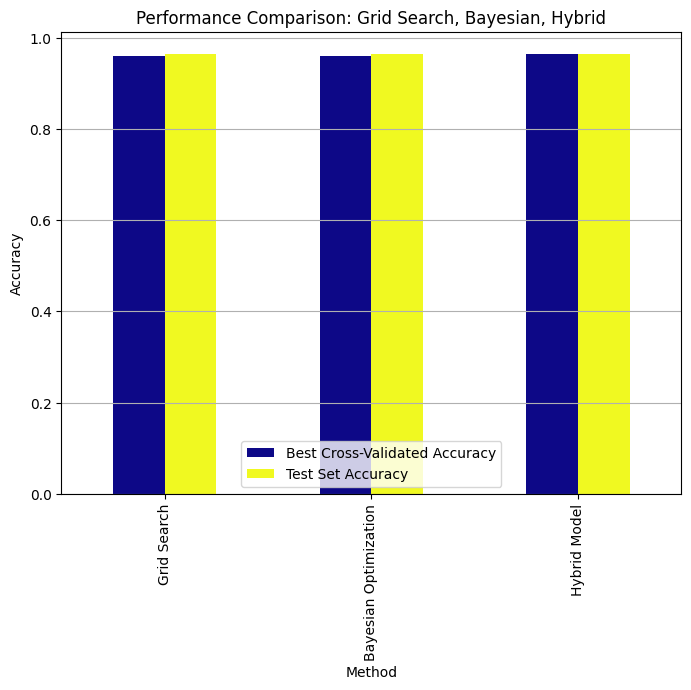

In [ ]:
# Add the hybrid model's accuracy to the comparison
comparison_df.loc[2] = ['Hybrid Model', refined_bayes_search.best_score_, final_accuracy]

# Plot comparison including Hybrid Model
comparison_df.set_index('Method').plot(kind='bar', figsize=(8, 6), colormap='plasma')
plt.title('Performance Comparison: Grid Search, Bayesian, Hybrid')
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.grid(axis='y')
plt.show()


Refined Bayesian Search Space:
n_estimators: (50, 150)
max_depth: (1, 10)
min_samples_split: (2, 4)
min_samples_leaf: (1, 3)

Refined Bayesian Optimization in progress...

Refined Bayesian Optimization Results:
Best Parameters: OrderedDict([('max_depth', 8), ('min_samples_leaf', 1), ('min_samples_split', 3), ('n_estimators', 130)])
Best Cross-Validation Accuracy: 0.9648

Final Model Test Accuracy (Hybrid): 0.9649

Top 5 Results from Refined Bayesian Optimization:
    param_n_estimators  param_max_depth  param_min_samples_split  \
3                  130                8                        3   
16                 150                8                        4   
15                 149                9                        4   
10                 150               10                        2   
11                 150                7                        2   

    param_min_samples_leaf  mean_test_score  
3                        1         0.964835  
16                       1     

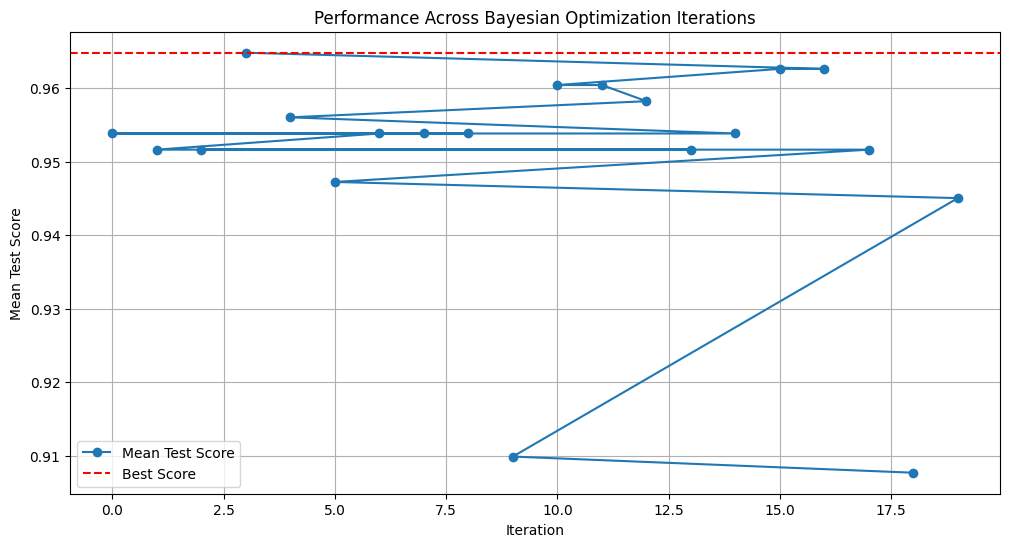

In [ ]:
# Refine the Bayesian search space based on top Grid Search results
refined_bayesian_space = {
    'n_estimators': (max(10, grid_search.best_params_['n_estimators'] - 50), grid_search.best_params_['n_estimators'] + 50),
    'max_depth': (max(1, grid_search.best_params_['max_depth'] - 5), grid_search.best_params_['max_depth'] + 5),
    'min_samples_split': (max(2, grid_search.best_params_['min_samples_split'] - 1), min(10, grid_search.best_params_['min_samples_split'] + 2)),
    'min_samples_leaf': (max(1, grid_search.best_params_['min_samples_leaf'] - 1), min(10, grid_search.best_params_['min_samples_leaf'] + 2)),
}

# Display refined search space for verification
print("Refined Bayesian Search Space:")
for param, value_range in refined_bayesian_space.items():
    print(f"{param}: {value_range}")

# Perform refined Bayesian Optimization
from skopt import BayesSearchCV

refined_bayes_search = BayesSearchCV(
    estimator=rf_model,  # RandomForestClassifier
    search_spaces=refined_bayesian_space,
    n_iter=20,  # Number of iterations
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

print("\nRefined Bayesian Optimization in progress...")
refined_bayes_search.fit(X_train, y_train)

# Best parameters and score from refined Bayesian optimization
print("\nRefined Bayesian Optimization Results:")
print(f"Best Parameters: {refined_bayes_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {refined_bayes_search.best_score_:.4f}")

# Final model evaluation on test data
final_model = refined_bayes_search.best_estimator_
final_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print(f"\nFinal Model Test Accuracy (Hybrid): {final_accuracy:.4f}")

# Visualization of Results
# Converting the results to a DataFrame for analysis
bayes_results = pd.DataFrame(refined_bayes_search.cv_results_)
bayes_results = bayes_results.sort_values(by='mean_test_score', ascending=False)

# Display results in a tabular format
print("\nTop 5 Results from Refined Bayesian Optimization:")
print(bayes_results[['param_n_estimators', 'param_max_depth',
                     'param_min_samples_split', 'param_min_samples_leaf',
                     'mean_test_score']].head())

# Plot the performance of different iterations
plt.figure(figsize=(12, 6))
plt.plot(bayes_results.index, bayes_results['mean_test_score'], marker='o', linestyle='-', label='Mean Test Score')
plt.axhline(refined_bayes_search.best_score_, color='red', linestyle='--', label='Best Score')
plt.title("Performance Across Bayesian Optimization Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Test Score")
plt.legend()
plt.grid()
plt.show()


CNN IMAGES

In [ ]:
!pip install numpy pandas matplotlib seaborn opencv-python


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Define dataset paths
histopathology_path = 'paultimothymooney/breast-histopathology-images'
cbis_ddsm_path = 'awsaf49/cbis-ddsm-breast-cancer-image-dataset'

# Function to display sample images
def display_sample_images(dataset_path, num_samples=5):
    """
    Display random sample images from the given dataset path.
    """
    print(f"\nDisplaying {num_samples} sample images from: {dataset_path}")
    image_files = []

    for root, _, files in os.walk(dataset_path):
        image_files.extend([os.path.join(root, file) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])

    if len(image_files) == 0:
        print("No images found in the dataset path.")
        return

    plt.figure(figsize=(15, 10))
    for i in range(min(num_samples, len(image_files))):
        img = Image.open(image_files[i])
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i+1}")
    plt.show()

# Display sample images
display_sample_images(histopathology_path)
display_sample_images(cbis_ddsm_path)

# Function to calculate basic image statistics
def calculate_image_statistics(dataset_path):
    """
    Calculate basic image properties like dimensions, mean, std, and class distribution.
    """
    print(f"\nAnalyzing images from: {dataset_path}")
    image_sizes = []
    means = []
    stds = []
    total_images = 0

    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)

                if img is not None:
                    h, w, c = img.shape
                    image_sizes.append((h, w, c))
                    means.append(np.mean(img))
                    stds.append(np.std(img))
                    total_images += 1

    print(f"Total Images: {total_images}")
    print(f"Average Image Dimensions (HxWxC): {np.mean(image_sizes, axis=0)}")
    print(f"Average Mean Pixel Intensity: {np.mean(means):.2f}")
    print(f"Average Std Dev of Pixel Intensity: {np.mean(stds):.2f}")

# Perform image analysis
calculate_image_statistics(histopathology_path)
calculate_image_statistics(cbis_ddsm_path)



Displaying 5 sample images from: paultimothymooney/breast-histopathology-images
No images found in the dataset path.

Displaying 5 sample images from: awsaf49/cbis-ddsm-breast-cancer-image-dataset
No images found in the dataset path.

Analyzing images from: paultimothymooney/breast-histopathology-images
Total Images: 0
Average Image Dimensions (HxWxC): nan
Average Mean Pixel Intensity: nan
Average Std Dev of Pixel Intensity: nan

Analyzing images from: awsaf49/cbis-ddsm-breast-cancer-image-dataset
Total Images: 0
Average Image Dimensions (HxWxC): nan
Average Mean Pixel Intensity: nan
Average Std Dev of Pixel Intensity: nan


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_sample_images(dataset_path, num_samples=5):
    """
    Display random sample images from the given dataset path.
    """
    print(f"\nDisplaying {num_samples} sample images from: {dataset_path}")
    image_files = []

    # Collect image files
    for root, _, files in os.walk(dataset_path):
        image_files.extend([os.path.join(root, file) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])

    if len(image_files) == 0:
        print("No images found in the dataset path.")
        return

    # Select random images
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))

    # Display images
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {i+1}")
    plt.show()

# Display sample images from both datasets
display_sample_images('paultimothymooney/breast-histopathology-images')
display_sample_images('awsaf49/cbis-ddsm-breast-cancer-image-dataset')



Displaying 5 sample images from: paultimothymooney/breast-histopathology-images
No images found in the dataset path.

Displaying 5 sample images from: awsaf49/cbis-ddsm-breast-cancer-image-dataset
No images found in the dataset path.
